# BMW Global Sales Analysis (2010–2024)

**Dataset:** `BMW_sales_data_2010_2024.csv`  
**Purpose:** Portfolio project to showcase business-facing insights and technical analysis of BMW global sales from 2010–2024.

## Executive Summary

**Objective:** Provide actionable insights into BMW’s sales (2010–2024) for better decision-making in production, pricing, and marketing.

**Top insights:**
- **Best year for revenue**: 2022 with **$1.344 trillion USD** earned.  
- **Top region by units sold**: Asia leads globally with **42,974,277 cars (16.96% share)**.  
- **Top model by revenue**: 7 Series (**$1.79 trillion USD** total).  
- **Hybrid/EV adoption trend**: stable at ~**50.9% in 2010** and ~**51.0% in 2024**.  

---

### Recommendations 
1. **Focus on top performers** – Prioritize stocking and promoting **top-selling models and colors** in **leading regions** (Asia and Europe) to maximize sales volume and regional share.  
2. **Strengthen EV/Hybrid positioning** – While this dataset shows flat adoption rates, real-world trends indicate strong growth in Europe & North America. BMW should invest in marketing and infrastructure partnerships to capture this accelerating demand.  
3. **Improve data collection & granularity** – Current dataset only covers annual totals. Collecting **monthly or transactional-level sales data** will enable insights into seasonality, customer behavior, and more precise demand forecasting.  
4. **Enhance customer insights** – Combine sales data with **customer demographics and feedback** to guide product design (engine size, fuel type) and tailor regional marketing strategies.  


## Data Visualizations

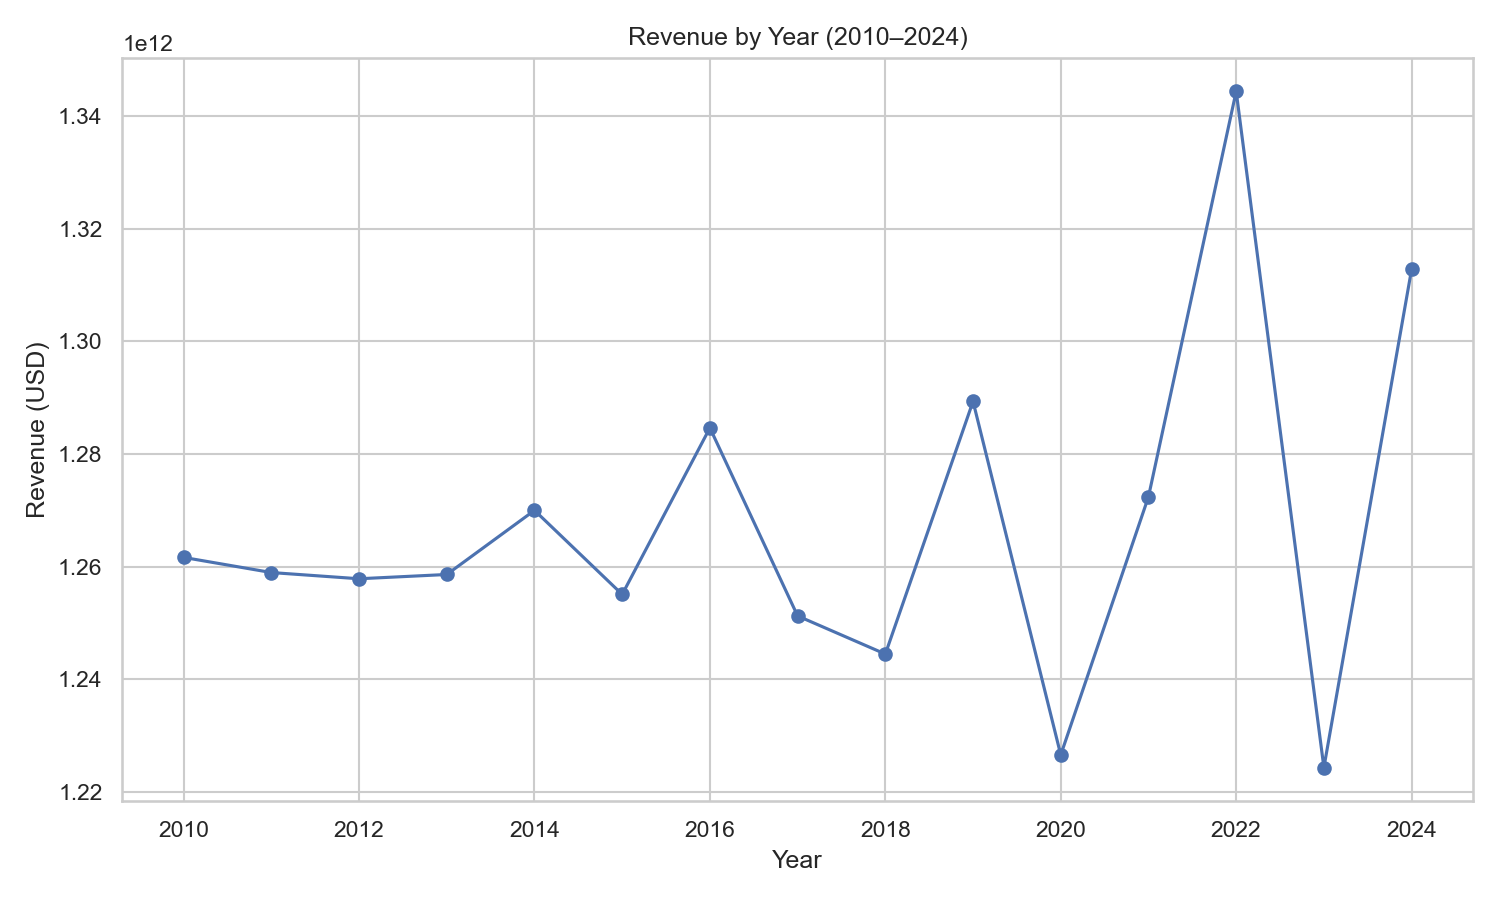

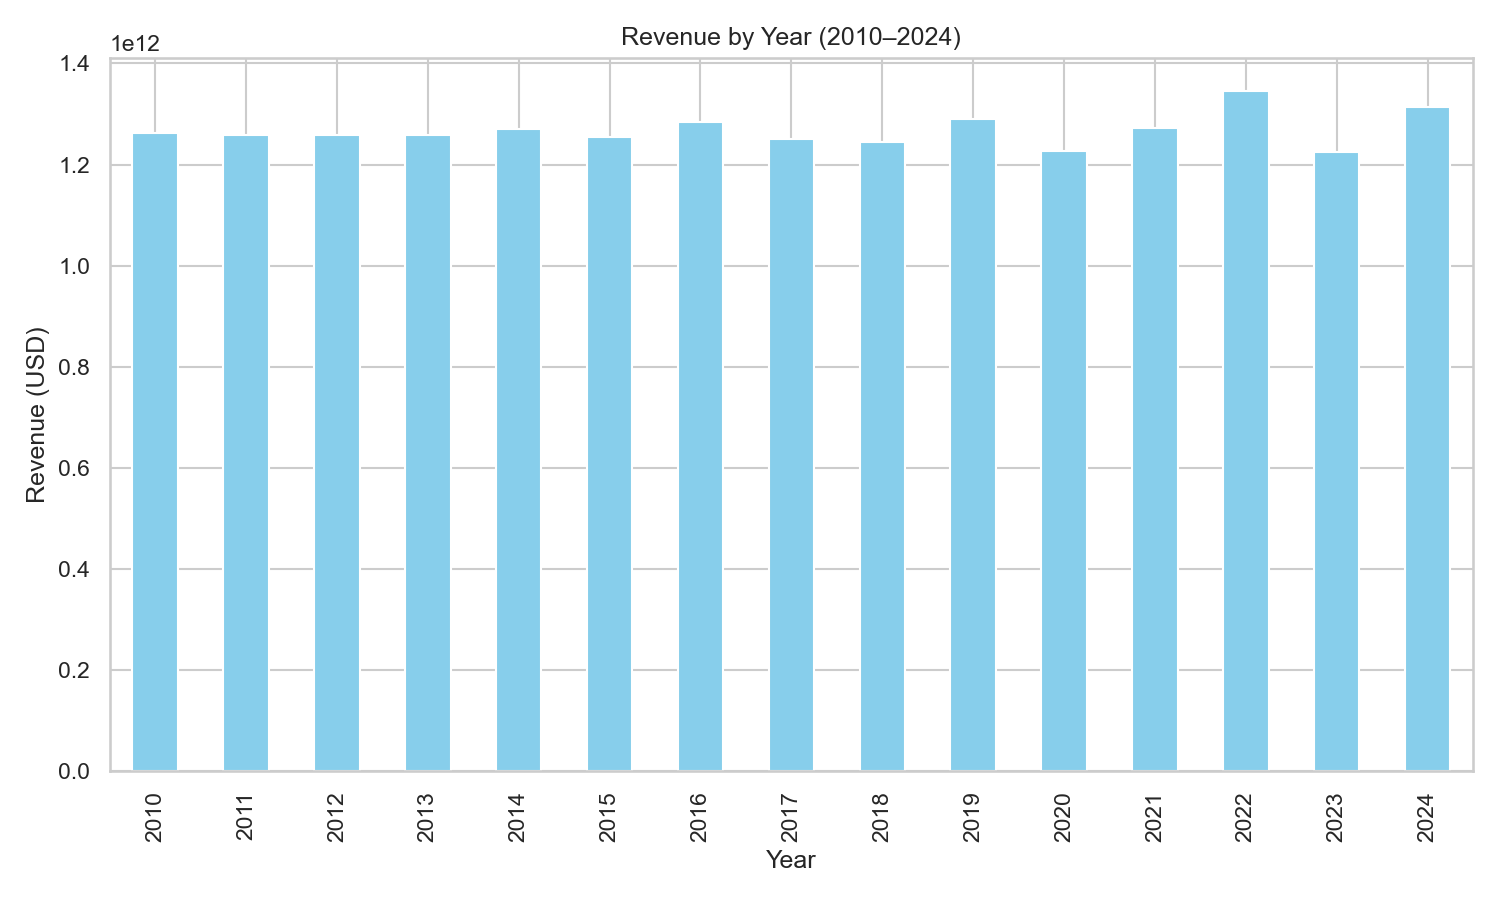

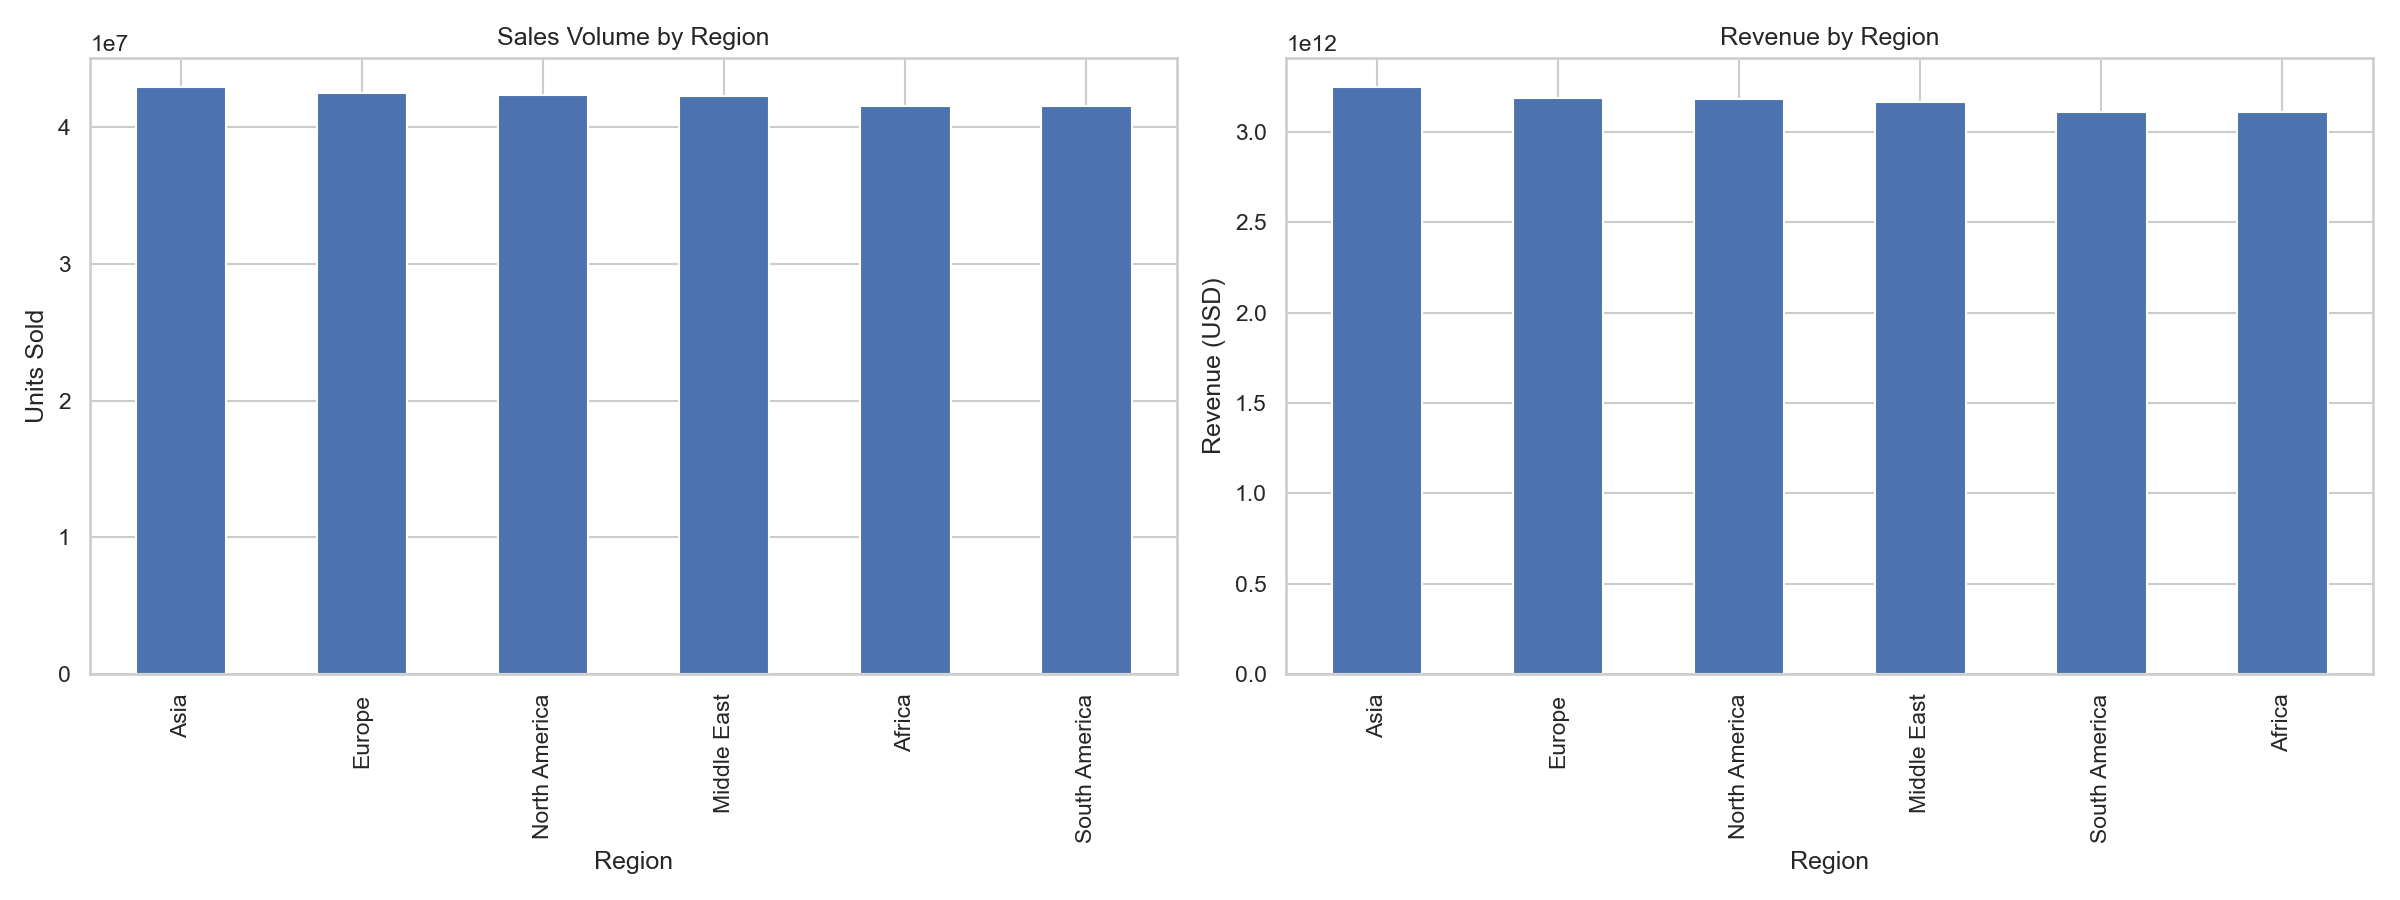

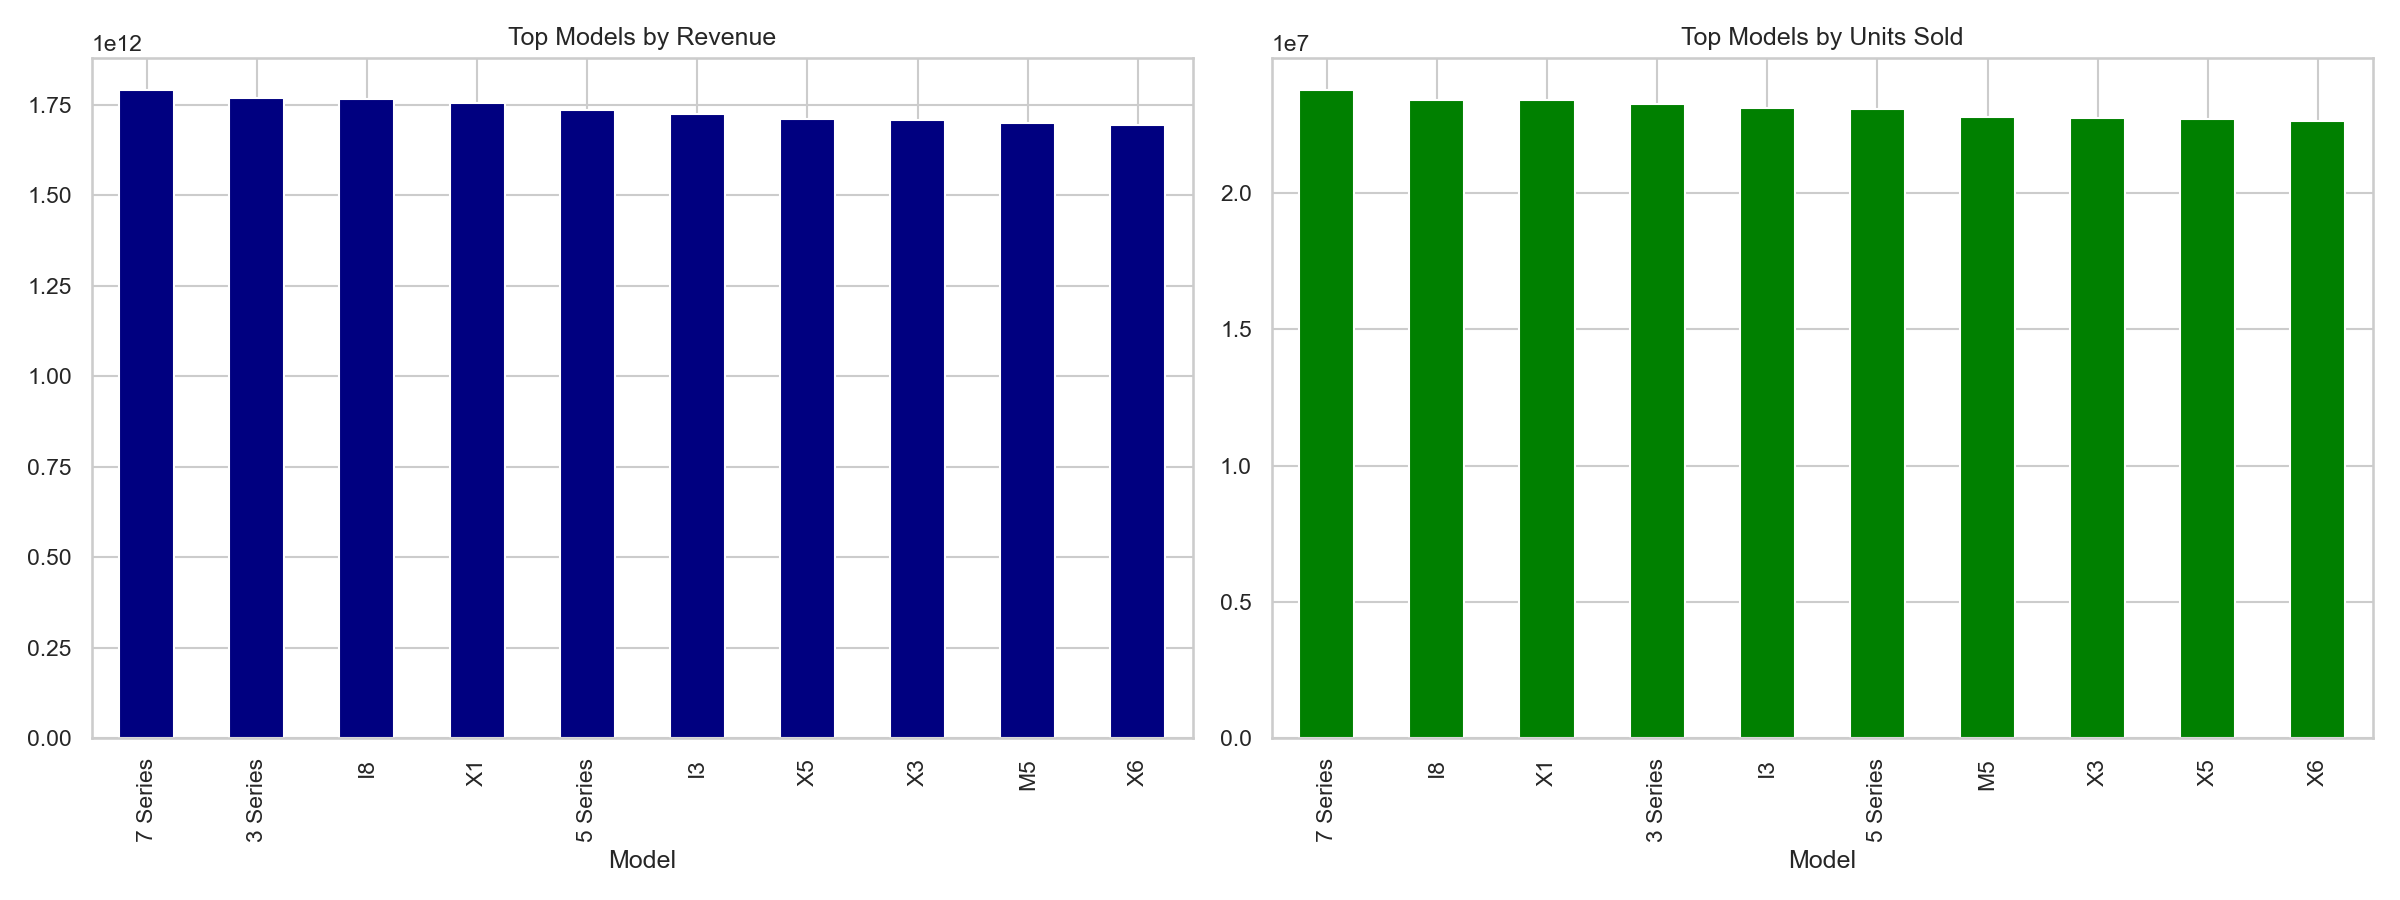

In [65]:
from IPython.display import Image, display
display(Image("outputs/sales_over_time.png"))
display(Image("outputs/best_year_revenue.png"))
display(Image("outputs/sales_by_region.png"))
display(Image("outputs/top_models.png"))


## Setup & Load Data

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# File & folder setup
DATA_PATH = os.path.join("data", "BMW_sales_data_2010_2024.csv")
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load data
df = pd.read_csv(DATA_PATH)
print("Initial rows:", df.shape[0])
df.head()


Initial rows: 50000


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


## Data Cleaning

In [58]:
df.info()
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates().copy()

# Normalize categories
for c in ["Model","Region","Color","Fuel_Type","Transmission","Sales_Classification"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.title()

# Convert to numeric
numeric_cols = ["Year","Engine_Size_L","Mileage_KM","Price_USD","Sales_Volume"]
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Keep only 2010–2024
df = df[df["Year"].between(2010, 2024)]
print("Rows after filter:", df.shape[0])

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
Missing values:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission       

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,I8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


## Creating Business Metrics (Adding Revenue column)

In [59]:
df["Revenue_USD"] = df["Price_USD"] * df["Sales_Volume"]
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue_USD
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,I8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


## Exploratory Data Analysis (Year-Based)
### A. Revenue by Year

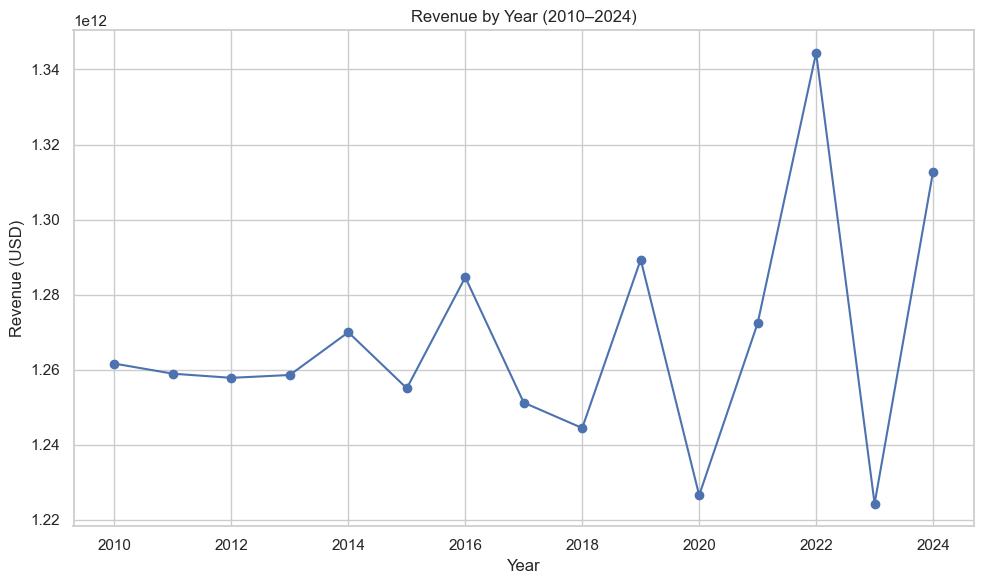

Year
2022    1344427738820
2024    1312808115466
2019    1289342744664
Name: Revenue_USD, dtype: int64

In [60]:
yr_rev = df.groupby("Year")["Revenue_USD"].sum().sort_index()
yr_rev.plot(marker='o')
plt.title("Revenue by Year (2010–2024)")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/sales_over_time.png", dpi=150)
plt.show()

yr_rev.sort_values(ascending=False).head(3)


### B. Best Year for Revenue

Best Year: 2022 with $1,344,427,738,820.00


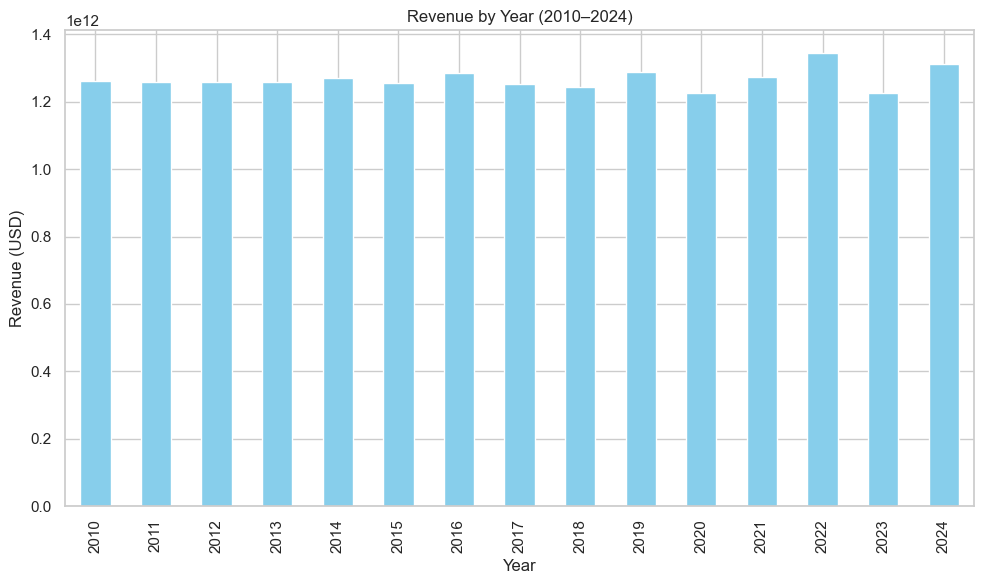

In [61]:
best_year = yr_rev.idxmax()
best_rev = yr_rev.max()
print(f"Best Year: {best_year} with ${best_rev:,.2f}")

yr_rev.plot(kind="bar", color="skyblue")
plt.title("Revenue by Year (2010–2024)")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/best_year_revenue.png", dpi=150)
plt.show()


### C. Sales by Region

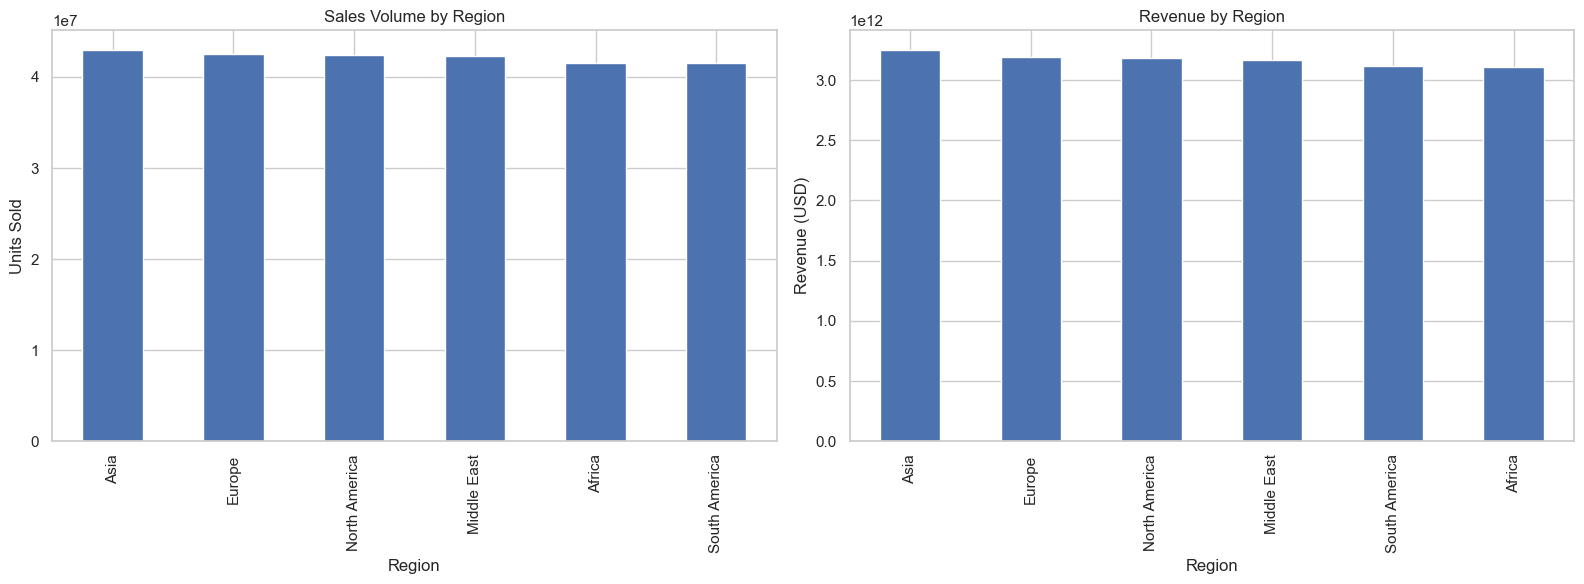

In [62]:
region_vol = df.groupby("Region")["Sales_Volume"].sum().sort_values(ascending=False)
region_rev = df.groupby("Region")["Revenue_USD"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,2, figsize=(16,6))
region_vol.plot(kind="bar", ax=ax[0])
ax[0].set_title("Sales Volume by Region")
ax[0].set_ylabel("Units Sold")

region_rev.plot(kind="bar", ax=ax[1])
ax[1].set_title("Revenue by Region")
ax[1].set_ylabel("Revenue (USD)")

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/sales_by_region.png", dpi=150)
plt.show()


### D. Top Models

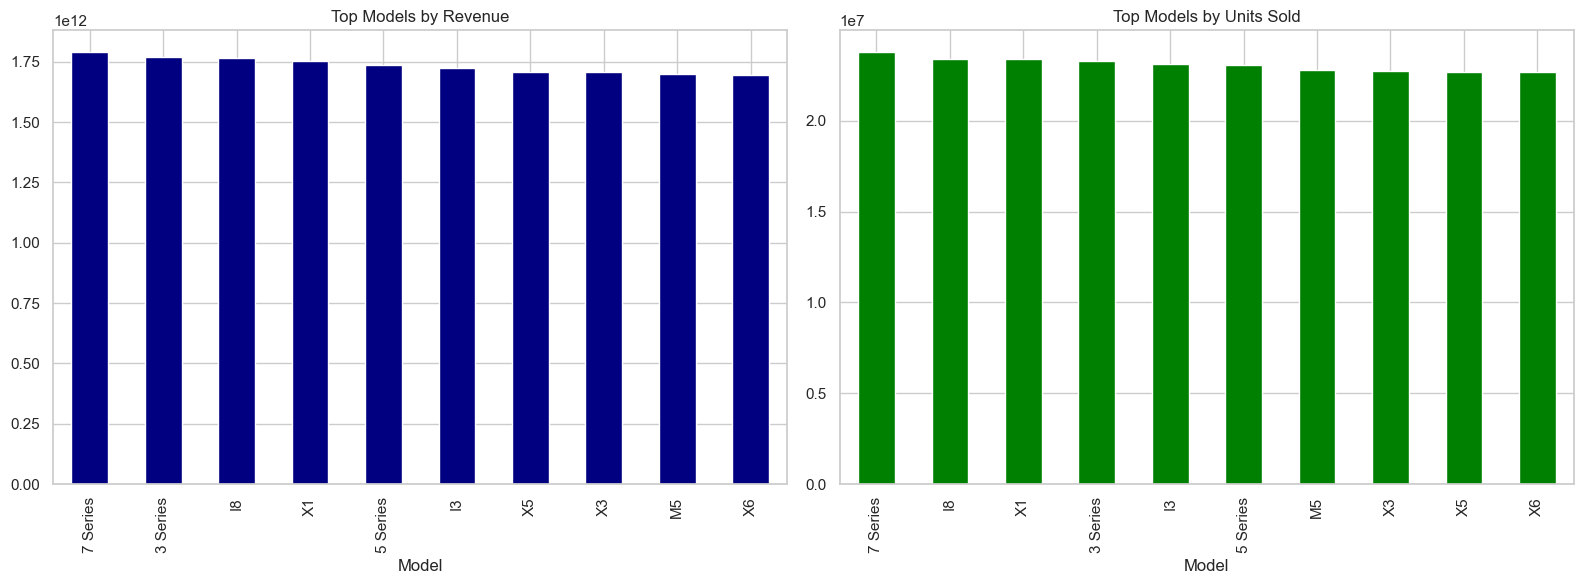

In [63]:
model_rev = df.groupby("Model")["Revenue_USD"].sum().sort_values(ascending=False).head(10)
model_vol = df.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(1,2, figsize=(16,6))
model_rev.plot(kind="bar", ax=ax[0], color="navy")
ax[0].set_title("Top Models by Revenue")

model_vol.plot(kind="bar", ax=ax[1], color="green")
ax[1].set_title("Top Models by Units Sold")

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/top_models.png", dpi=150)
plt.show()


## Part 7 — Correlation & Outliers

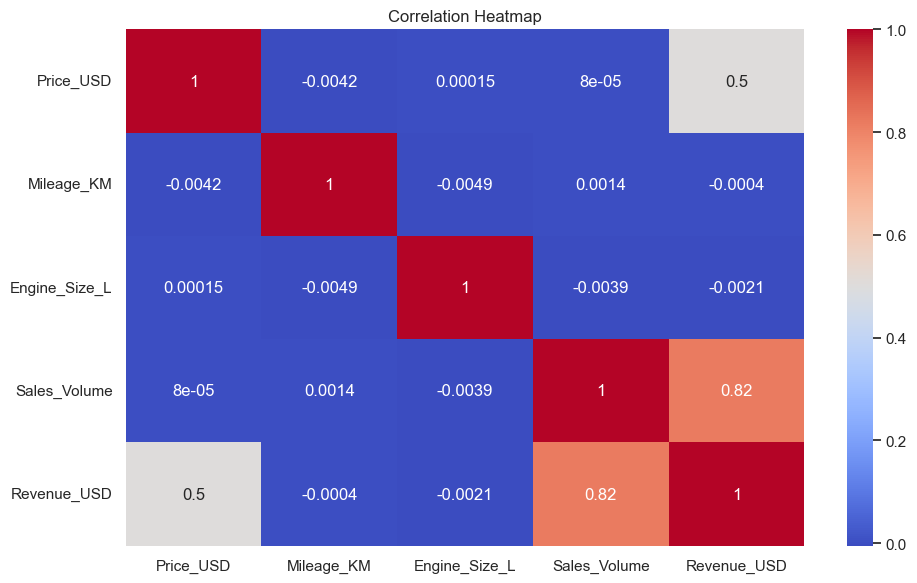

Price outliers count: 0


In [64]:
corr = df[["Price_USD","Mileage_KM","Engine_Size_L","Sales_Volume","Revenue_USD"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/correlations.png", dpi=150)
plt.show()

# Price outliers
Q1, Q3 = df["Price_USD"].quantile([0.25,0.75])
IQR = Q3 - Q1
outliers = df[(df["Price_USD"] < Q1 - 1.5*IQR) | (df["Price_USD"] > Q3 + 1.5*IQR)]
print("Price outliers count:", len(outliers))
